In [4]:
# reqeusts, bs4 import
import requests
import bs4
from bs4 import BeautifulSoup

##### 1-1 Daum 뉴스기사 제목 스크래핑하기

In [ ]:
def list_news(catalog):

    #req_param = {'catalog' : 'economy'}
    #url = 'https://news.daum.net/{catalog}'.format(**req_param)
    url = f'https://news.daum.net/{catalog}'

    #header 설정
    req_header = {
        'user_agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
    }

    # requests get호출
    res = requests.get(url, headers=req_header)
    res.encoding = 'utf-8'

    if res.ok :
        html = res.text
        soup = BeautifulSoup(html, 'html.parser')
        
        
        # CSS 선택자
        a_tag_list = soup.select("li a[href*='v.daum.net/v']")  # div.cont_thumb strong.tit_txt
        #li_tag_list = soup.select("ul.list_newsheadline2 li")
        
        
        print(f'{url}')
        print(type(res))
        print(res.status_code)
        print(f'{type(a_tag_list)} {len(a_tag_list)}')
        
        # <a> 태그 리스트 순회하기
        for a_tag in a_tag_list:
            #print(type(a_tag))
            #a_tag = li_tag.find('a')
            
            title = a_tag.select_one("div.cont_thumb strong.tit_txt").text.strip()
            #strong_tags = li_tag.select('div.cont_thumb strong.tit_txt')
            if strong_tags: # tag가 있는지 여부를 확인하고 인덱스 0을 꺼내는 게 좋다
                strong_tag = strong_tags[0]

            #strong_tag = li_tag.select_one('div.cont_thumb strong.tit_txt')

            # href 속성의 값을 가져오기
            link = a_tag['href']
            print(f'{link}\n{title}')
    else :
        print(f'Error code : {res.status_code}');


list_news('economy')

https://news.daum.net/economy
<class 'requests.models.Response'>
200
<class 'bs4.element.ResultSet'> 80
https://v.daum.net/v/20250408161553109
트럼프발 주가폭락에 동아 "경제적 핵전쟁" 조선 "금융위기 후 최악"
https://v.daum.net/v/20250408160526681
공황과 격변의 판도라 박스가 열리다
https://v.daum.net/v/20250408154329660
해외서 발 뺀 이중항체, 韓 기업들이 이끈다
https://v.daum.net/v/20250408153003030
탄핵 끝났는데 韓경제 ‘봄’은 언제 오나…박근혜 때와 다른 이유
https://v.daum.net/v/20250408152923007
경상수지 흑자행진에도… 한은 “美 관세에 불확실성 확대”
https://v.daum.net/v/20250408144527816
국제유가 하락에 흔들리는 정유업계…실적 먹구름 짙어진다
https://v.daum.net/v/20250408140753767
조양호 한진그룹 선대회장 6주기… ‘45년 항공산업’ 리더십 재조명
https://v.daum.net/v/20250408140302580
미국 최대 은행이 "여성 경영인이 경제 원동력"이라 말한 이유
https://v.daum.net/v/20250408124446384
불평등 부채질하는 재난: 환경부는 약자 비명 듣고 있나요?
https://v.daum.net/v/20250408164759375
송미령 "민관 '원팀'으로 미국 상호관세 파고 넘을것"(종합)
https://v.daum.net/v/20250408164507255
경과원, 베트남서 남양주 우수기업 기술력 입증 지원
https://v.daum.net/v/20250408164102073
금융위 "잠재성장률 하락·인구구조 변화 속 자본시장 역할 더욱 중요"
https://v.daum.net/v/202504081640550

##### 1-2 뉴스기사의 링크와 제목 스크래핑 및 출력

In [ ]:


section_dict = {'기후/환경':'climate','사회':'society','경제':'economy','정치':'politics',\
             '국재':'world','문화':'culture','생활':'life','IT/과학':'tech','인물':'people'}

# 함수선언
def print_news(section_name):
    #section = section_dict[section_name]    # KeyError 발생
    section = section_dict.get(section_name)
        
    if section is None:
        print('요청하신 Key가 없습니다.')
    else:
        url = f'https://news.daum.net/{section}'
        
        #header 설정
        req_header = {
            'user_agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
        }

        # requests get호출
        res = requests.get(url, headers=req_header)
        res.encoding = 'utf-8'

        if res.ok :
            html = res.text
            soup = BeautifulSoup(html, 'html.parser')
            
            # CSS 선택자
            a_tag_list = soup.select("li a[href*='v.daum.net/v']")  # div.cont_thumb strong.tit_txt
            
            print(f'======> {url} {section_name} 뉴스 <======')

            # <a> 태그 리스트 순회하기
            for a_tag in a_tag_list:
                title = a_tag.select_one("div.cont_thumb strong.tit_txt").text.strip()

                link = a_tag['href']
                print(f'{link}\n{title}')
        else :
            print(f'Error code : {res.status_code}');



# 함수호출
#print_news('경제')
print_news('인물2')


요청하신 Key가 없습니다.


##### Nate 뉴스기사 제목 스크래핑하기

nate 뉴스 기사 : 성공! 200
selction_name : https://news.nate.com/recent?mid=n0100

기사 제목 : 유세윤, 부모님과 효도 여행 치열한 수싸움···무슨 일? (선넘패)
기사 링크 : https://news.nate.com/view/20250409n20836?mid=n0100



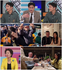

기사 제목 : 한국 공공사회복지 지출 비중, OECD 평균에 크게 못 미쳐
기사 링크 : https://news.nate.com/view/20250409n20835?mid=n0100



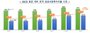

기사 제목 : 환율, 장중 1480원대 후반까지 급등
기사 링크 : https://news.nate.com/view/20250409n20834?mid=n0100



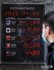

기사 제목 : 제천·단양경찰, 대선 '선거사범 수사상황실' 가동
기사 링크 : https://news.nate.com/view/20250409n20833?mid=n0100



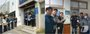

기사 제목 : 환율, 장중 1480원대 후반까지 급등
기사 링크 : https://news.nate.com/view/20250409n20832?mid=n0100



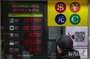

기사 제목 : 한국사회복지협의회 전국푸드뱅크, 경북·경남 산불지역에 긴급구호물품 지원
기사 링크 : https://news.nate.com/view/20250409n20831?mid=n0100



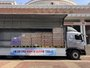

기사 제목 : '자생 새우난초 보세요'…국립백두대간수목원서 특별전
기사 링크 : https://news.nate.com/view/20250409n20830?mid=n0100



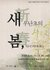

기사 제목 : 美상호관세 발효, 본게임 시작…협상 키워드는 '맞춤형·원스톱'
기사 링크 : https://news.nate.com/view/20250409n19738?mid=n0100



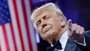

기사 제목 : 환율, 장중 금융위기 후 최고치
기사 링크 : https://news.nate.com/view/20250409n20828?mid=n0100



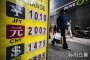

기사 제목 : 1500원 바라보는 환율
기사 링크 : https://news.nate.com/view/20250409n20827?mid=n0100



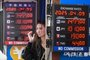

기사 제목 : 'KBS 시말서의 신' 전현무, 사과문의 정석 또 보여줬다
기사 링크 : https://news.nate.com/view/20250409n20239?mid=n0100



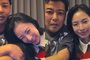

기사 제목 : '6경기서 4승' 황선홍 대전 감독, 2·3월의 감독상 수상
기사 링크 : https://news.nate.com/view/20250409n20825?mid=n0100



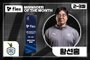

기사 제목 : 금감원, 대부업 특별점검···"돈 못갚아도 집 뺏기 전 절차 필수"
기사 링크 : https://news.nate.com/view/20250409n20824?mid=n0100



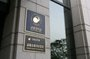

기사 제목 : 1500원 바라보는 환율
기사 링크 : https://news.nate.com/view/20250409n20823?mid=n0100



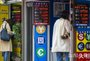

기사 제목 : [오후장 선택과 집중] 생산 라인 증설로 중국 조선사향 납품 확대 기대 '한국카본'
기사 링크 : https://news.nate.com/view/20250409n20822?mid=n0100

기사 제목 : 주인 무덤까지 들어가 인사한 반려견 '감동'…"순수한 사랑"
기사 링크 : https://news.nate.com/view/20250409n20738?mid=n0100



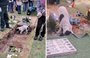

기사 제목 : [포토]조이, 따뜻한 봄 패션
기사 링크 : https://news.nate.com/view/20250409n20820?mid=n0100



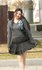

기사 제목 : '환율 더 오를까', 붐비는 환전소
기사 링크 : https://news.nate.com/view/20250409n20819?mid=n0100



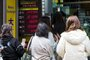

기사 제목 : 대구·경북 실물경기 들여다 보니…생산 늘었지만 소비는 '꽁꽁'
기사 링크 : https://news.nate.com/view/20250409n20818?mid=n0100



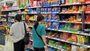

기사 제목 : 심민 임실군수, 인구문제 인식 개선 릴레이 캠페인 동참
기사 링크 : https://news.nate.com/view/20250409n20817?mid=n0100



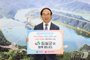

In [ ]:
# Nate 뉴스기사 제목 스크래핑하기
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from IPython.display import Image, display



section_dict = {'최신뉴스':100, '정치':200, '경제':300, '사회':400, '세계':500, 'IT/과학':600}

# 함수선언
def print_news(section_name):
    section = section_dict[section_name]
    url = f'https://news.nate.com/recent?mid=n0{section}'
    req_header = {
        'user_agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36',
        'referer': url
    }
    
    res = requests.get(url, headers=req_header)
   
    print(f'nate 뉴스 기사 : 성공! {res.status_code}')
    print(f'selction_name : {url}\n')

    if res.ok:
        html = res.text
        soup = BeautifulSoup(html, 'html.parser')
        a_tag_list = soup.select("div.mlt01 a.lt1") #span.tb h2.tit
                
        
        for a_tag in a_tag_list:
            link = a_tag['href']
            title = a_tag.select_one("span.tb h2.tit").text.strip()
            print(f'기사 제목 : {title}\n기사 링크 : https:{link}\n')
            
            image_tags = a_tag.select("img[src*='news.nateimg.co.kr/orgImg']")
            if image_tags:
                img_src = image_tags[0].get('src')
                img_url = urljoin('http:', img_src)
                display(Image(img_url))
    else:
        print(f'Error code : {res.status_code}')


print_news('최신뉴스')
#print_news('경제')

In [ ]:
#그냥 해봄

def print_news():
    url = "https://finance.naver.com/news/"
    
    req_header = {
        'user_agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36'
    }
    
    res = requests.get(url, headers=req_header)
    
    if res.ok:
        html = res.text
        soup = BeautifulSoup(html, 'html.parser')
        a_tag_list = soup.select("div.main_news ul li a[href*='article']")
        
        
        print(len(a_tag_list))
      
        for a_tag in a_tag_list:
            title = a_tag.text.strip()
            print(type(a_tag))
            print(f'article title : {title}')
    else:
        print(f'Error message : {res.status_code}')

print_news()

##### 2-2. 하나의 네이버 웹툰과 1개의 회차에 대한 Image 다운로드 하기

In [21]:
import requests
import os
from bs4 import BeautifulSoup

def download_one_episode(title,no,url):
    req_header = {
        'referer' : url
    }

    imgdir_name = os.path.join('img', title, str(no))   # img\낢이사는이야기\48 디렉토리가 생성
    os.makedirs(imgdir_name, exist_ok=True)

    # 웹 페이지 요청 및 확인
    res = requests.get(url)
    if not res.ok:
        print(f'Error Code = {res.status_code}')
        exit()
    
    # 이미지 URL 추출
    soup = BeautifulSoup(res.text, 'html.parser')
    img_url_list = [img_tag['src'] for img_tag in soup.select("img[src*='IMAG01']")]

    # 이미지 다운로드
    for img_url in img_url_list:
        res = requests.get(img_url, headers=req_header)
        if res.ok:
            img_data = res.content
            file_path = os.path.join(imgdir_name, os.path.basename(img_url))
            with open(file_path, 'wb') as file:
                file.write(img_data)
        else:
            print(f'Error Code = {res.status_code} for {img_url}')
    print(f'Complete : {res.status_code}')

if __name__ == '__main__':
    #download_one_episode('낢이사는이야기',48,'https://comic.naver.com/webtoon/detail?titleId=833255&no=49&week=tue')
    download_one_episode('멍멍냠냠', 3, 'https://comic.naver.com/webtoon/detail?titleId=838203&no=3&week=finish')


Complete : 200
